# HSE Машинное обучение и майнинг данных

## Семинар 6 Часть 1: Задачи регрессии


### Екатерина Кондратьева, Полина Полунина

# Оценка качества алгоритмов машинного обучения. Кросс-валидация. 


In [1]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Смотрим на данные

Они уже предобработаны

In [2]:
cols=['Id', 'MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [3]:
data = pd.read_csv('train.csv', index_col=0, usecols=cols)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


## Посмотрим на данные:


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0


*Делим данные на тренировочную и тестовую выборки*

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1), data.SalePrice, test_size=0.2, random_state=42
)

In [6]:
from sklearn.feature_selection import SelectKBest
skb = SelectKBest()

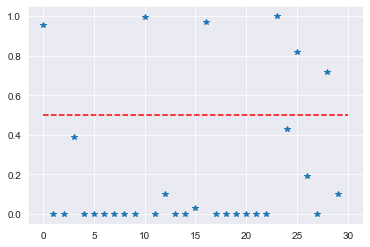

In [7]:
plt.plot(skb.fit(X_train,y_train).pvalues_, '*')
plt.hlines(0.5, 0, 30, 'r', '--');

## 2. Baseline

In [8]:
# модель 1: линейная регрессия
from sklearn.linear_model import LinearRegression
# определяем и обучаем модель на тренировочной выборке
linreg = LinearRegression().fit(X_train, y_train)
# предсказываем на тестовой выборке
preds_linreg = linreg.predict(X_test)
# считаем скор на тестовой выборке
linreg.score(X_test, y_test)

0.8179863828691972

In [9]:
# модель 2: random forest
from sklearn.ensemble import RandomForestRegressor
# определяем модель
rf = sklearn.ensemble.RandomForestRegressor()
# обучаем модель
model_rf = rf.fit(X_train, y_train)
# предсказываем
preds_rf = model_rf.predict(X_test)
# считаем скор
model_rf.score(X_test, y_test)

0.8666316671357963

In [10]:
# модель 3: svm
from sklearn.svm import SVR
# определяем модель
svm = SVR(kernel='linear')
# обучаем модель
model_svm = svm.fit(X_train, y_train)
# предсказываем
preds_svm = model_svm.predict(X_test)
# считаем скор
model_svm.score(X_test, y_test), 

(0.7670074262556246,)

## 2.3 Выбираем модель

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

random_state = 42
kfold = KFold(n_splits=20, random_state= random_state)# проверить 20 фолдов


list_1 = []  # обозначим пустой лист, куда будем записывать точность после каждой итерации
list_2 = []

X = np.asarray(X_train)
y = np.asarray(y_train)

i = 0

for train_index, test_index in kfold.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]  # срежем массив по нужным индексам, индексы выбираются в функции kfold
    y_train, y_test = y[train_index], y[test_index]
    
    model_rf.fit(X_train,y_train)
    linreg.fit(X_train,y_train)
    
    list_1.append(r2_score(model_rf.predict(X_test),y_test))
    list_2.append(r2_score(linreg.predict(X_test),y_test))
    
    print('Fold #', i)
    i += 1  # следующая итерации

Fold # 0
Fold # 1
Fold # 2
Fold # 3
Fold # 4
Fold # 5
Fold # 6
Fold # 7
Fold # 8
Fold # 9
Fold # 10
Fold # 11
Fold # 12
Fold # 13
Fold # 14
Fold # 15
Fold # 16
Fold # 17
Fold # 18
Fold # 19


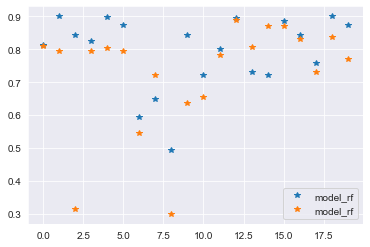

In [12]:
plt.plot(list_1, "*")
plt.plot(list_2,"*")
plt.legend(['model_rf', 'model_rf']);

### 2.4 Будем улучшать модель RFR

In [13]:
model_rf.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
# все делаем теперь по красоте, нам нужен лучший скор
pipe = Pipeline([('standardizer', scaler), ('rfr', model_rf)])

param_grid = { 
    'rfr__n_estimators': [200, 500],
    'rfr__max_features': ['auto', 'sqrt', 'log2'],
    'rfr__max_depth' : [4,5,6,7,8],
}
clf = GridSearchCV(pipe, param_grid, scoring = 'r2',cv=5).fit(X, y)# а если оптимизировать neg_mean_squared_error

In [15]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [16]:
clf.cv_results_

{'mean_fit_time': array([1.0182198 , 2.56867261, 0.35118766, 0.85959983, 0.31594505,
        0.80422125, 1.2333303 , 3.05810766, 0.38936996, 0.97263355,
        0.35694165, 0.86782837, 1.43428931, 3.17619371, 0.39878168,
        1.01480184, 0.39893579, 0.98607912, 1.68049307, 4.15966005,
        0.48404036, 1.21271491, 0.43391175, 1.08029575, 1.84462724,
        4.63364024, 0.54944472, 1.36151605, 0.48010464, 1.19037852]),
 'std_fit_time': array([0.02414787, 0.00532898, 0.00477315, 0.01603975, 0.00531581,
        0.00961462, 0.02755589, 0.04849621, 0.00060948, 0.01139766,
        0.00187139, 0.02830685, 0.00142575, 0.35066571, 0.06150724,
        0.04562025, 0.01143753, 0.0096001 , 0.03036716, 0.03060824,
        0.00300947, 0.01699051, 0.00098288, 0.00473769, 0.00153908,
        0.02075823, 0.01424286, 0.03163507, 0.00094976, 0.00652335]),
 'mean_score_time': array([0.02093811, 0.04708471, 0.01994371, 0.04775243, 0.02064953,
        0.04742765, 0.01954961, 0.05006766, 0.02055974, 0.04

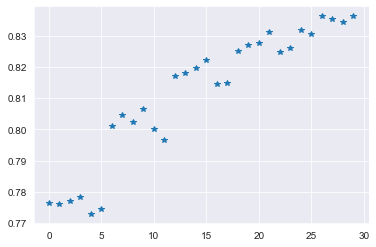

In [17]:
plt.plot(clf.cv_results_['mean_test_score'],'*');

## 3. Тестируем на отложенных данных

In [18]:
print( 'MAE: ', 
    sklearn.metrics.mean_absolute_error(
        y_test, clf.best_estimator_.predict(X_test)))

print( 'RMSE: ', 
    np.sqrt(
        sklearn.metrics.mean_squared_error(
            y_test, clf.best_estimator_.predict(X_test))))

print( 'R2: ', 
    np.sqrt(
        sklearn.metrics.r2_score(
            y_test, clf.best_estimator_.predict(X_test))))
print( 'Диапазон ключевой переменной: ', abs(np.min(y_test) - np.max(y_test)))

MAE:  10560.651511207587
RMSE:  14262.046211378314
R2:  0.9849788396612432
Диапазон ключевой переменной:  485500


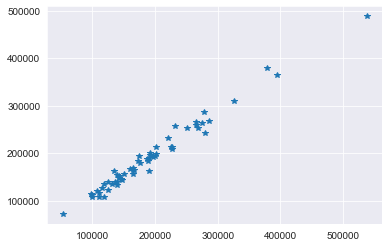

In [19]:
plt.plot(y_test, pd.DataFrame(clf.best_estimator_.predict(X_test)),'*');

#### Насколько изменятся значения после применения scaler()?

# 4. Интерпретация результата

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1), data.SalePrice, test_size=0.2, random_state=42
)

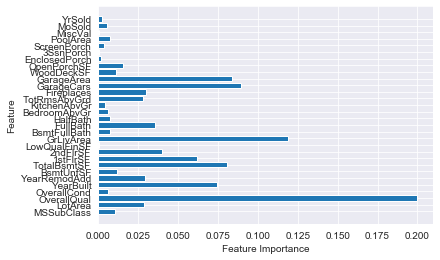

In [21]:
n_feature = X_train.shape[1]
plt.barh(range(n_feature), clf.best_estimator_['rfr'].feature_importances_, align='center')
plt.yticks(np.arange(n_feature), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#### Посмотрим на другие решения:

https://www.kaggle.com/kradio3/my-first-machine-learning-model/notebook

https://www.kaggle.com/mgmarques/houses-prices-complete-solution#House-Prices---Kaggle-Copetitions